In [105]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings("ignore")

# Information About the Datset

**This Dataset contains 10 fields of information about patients. The characteristics of the cell samples from each patient are contained in fields Clump to Mit. The values are graded from 1 to 10, with 1 being the closest to benign.**

**The Class field contains the diagnosis, as confirmed by separate medical procedures, as to whether the samples are benign (value = 2) or malignant (value = 4). This will help determine if patients have growth that could lead to breast cancer or not.**

**A benign condition refers to a tumor or growth that is not cancerous.**
**A malignant condition refers to a tumor or growth that is cancerous.**

# Defining Column Names

ID - Identifier

Clump - Clump Thickness

UnifSize - Uniformity of Cell Size

UnifShape - Uniformity of Cell Shape

MargAdh - Marginal Adhesion

SingEpiSize - Single Epithelial Cell Size

BareNuc - Bare Nuclei

BlandChrom - Bland Chromatin

NormNucl - Normal Nucleoli

Mit - Mitoses

Class - Benign or Malignant

In [59]:
#reading the dataset
df = pd.read_csv("/content/cell_samples.csv")
df

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


# **Data Cleaning**

In [60]:
#checking for duplicated values
df.duplicated().sum()

8

In [61]:
#dropping duplicates
df = df.drop_duplicates()

In [62]:
#checking for null values
df.isnull().sum()

ID             0
Clump          0
UnifSize       0
UnifShape      0
MargAdh        0
SingEpiSize    0
BareNuc        0
BlandChrom     0
NormNucl       0
Mit            0
Class          0
dtype: int64

In [63]:
#checking for non applicable values
df.isna().sum()

ID             0
Clump          0
UnifSize       0
UnifShape      0
MargAdh        0
SingEpiSize    0
BareNuc        0
BlandChrom     0
NormNucl       0
Mit            0
Class          0
dtype: int64

In [64]:
#checking dimention of the df
df.shape

(691, 11)

In [65]:
#statistics of the df
df.describe()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BlandChrom,NormNucl,Mit,Class
count,6.910000e+02,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000,691.000000
mean,1.073333e+06,4.426918,3.130246,3.201158,2.824891,3.211288,3.435601,2.882779,1.593343,2.688857
std,6.192953e+05,2.815861,3.041328,2.959886,2.866552,2.199852,2.442345,3.066298,1.723129,0.951051
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.725490e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238437e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [66]:
df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [74]:
#conerting BareNuc dtype to int
df = df[pd.to_numeric(df['BareNuc'], errors='coerce').notnull()]
df['BareNuc'] = df['BareNuc'].astype('int')
df.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [76]:
df.columns

Index(['ID', 'Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize',
       'BareNuc', 'BlandChrom', 'NormNucl', 'Mit', 'Class'],
      dtype='object')

In [67]:
df.count()

ID             691
Clump          691
UnifSize       691
UnifShape      691
MargAdh        691
SingEpiSize    691
BareNuc        691
BlandChrom     691
NormNucl       691
Mit            691
Class          691
dtype: int64

In [68]:
df['Class'].value_counts()

2    453
4    238
Name: Class, dtype: int64

# **Visualization**

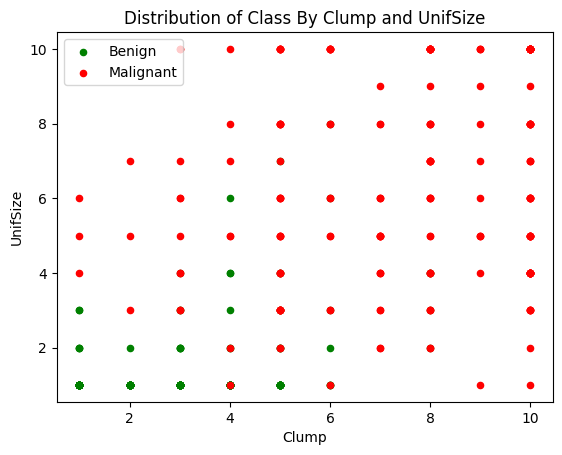

In [69]:
#benign and malignant class
benign_df = df[df['Class']==2][0:200] # Selecting first 200 rows where Class is 2
malignant_df = df[df['Class']==4][0:200] # Selecting first 200 rows where Class is 4

axes =benign_df.plot (kind='scatter', x='Clump', y='UnifSize', color='green', label='Benign')
malignant_df.plot (kind='scatter', x='Clump', y='UnifSize', color='red', label='Malignant', ax=axes)
plt.title("Distribution of Class By Clump and UnifSize")
plt.show()

In [70]:
df.head()

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


# **Splitting the independent from dependent column and leaving out the ID column**

In [82]:
#indeoendent variable
input = df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
input

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit
0,5,1,1,1,2,1,3,1,1
1,5,4,4,5,7,10,3,2,1
2,3,1,1,1,2,2,3,1,1
3,6,8,8,1,3,4,3,7,1
4,4,1,1,3,2,1,3,1,1
...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1
695,2,1,1,1,2,1,1,1,1
696,5,10,10,3,7,3,8,10,2
697,4,8,6,4,3,4,10,6,1


In [81]:
#dependent Variable
target = df['Class']
target

0      2
1      2
2      2
3      2
4      2
      ..
694    2
695    2
696    4
697    4
698    4
Name: Class, Length: 675, dtype: int64

# **Training, Testing and Modelling**

In [94]:
#training and testings data
x_train, x_test, y_train, y_test = train_test_split(input, target, test_size = 0.2, random_state = 4)

In [89]:
x_train.shape

(540, 9)

In [91]:
x_test.shape

(135, 9)

In [92]:
y_train.shape

(540,)

In [93]:
y_test.shape

(135,)

In [95]:
#SVC model
model = SVC()

In [101]:
#fitting data into the model
model.fit(x_train,y_train)

SVC()

In [102]:
#model score
model.score(x_test,y_test)

0.9555555555555556

In [103]:
y_predict = model.predict(x_test)
y_predict

array([2, 4, 4, 2, 4, 2, 2, 4, 2, 2, 4, 2, 4, 4, 2, 4, 2, 2, 2, 2, 4, 2,
       4, 2, 4, 2, 2, 4, 4, 2, 2, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2,
       2, 2, 2, 4, 2, 2, 4, 4, 2, 4, 4, 2, 2, 4, 2, 2, 4, 2, 2, 4, 2, 2,
       4, 2, 2, 2, 2, 4, 2, 4, 2, 2, 4, 4, 2, 2, 4, 4, 4, 2, 4, 4, 2, 4,
       2, 4, 2, 2, 4, 2, 2, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2,
       4, 2, 4, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2, 4, 4, 4, 2,
       2, 2, 2])

In [107]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           2       0.99      0.94      0.96        86
           4       0.91      0.98      0.94        49

    accuracy                           0.96       135
   macro avg       0.95      0.96      0.95       135
weighted avg       0.96      0.96      0.96       135

